In [4]:
#Reading data
import pandas as pd
df=pd.read_csv("D:\\BBAU1\\Image Classification\\train.csv")
df.head()

,Image,Label
0,1.jpg,Icy
1,2.jpg,Icy
2,3.jpg,Icy
3,4.jpg,Icy
4,5.jpg,Icy


In [5]:
#Taking name of image file from data frame df and reading image data
folder="D:\\BBAU1\\Image Classification\\images\\"
file=df.iloc[4].Image
path=folder+file
print(path)

D:\BBAU1\Image Classification\images\5.jpg


In [6]:
from skimage.io import imread,imshow
image_data=imread(path)
imshow(image_data)

In [7]:
image_data.shape

(4032, 2268, 3)

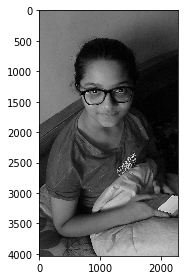

In [8]:
#read grey image
image_black=imread(path,as_gray=True)
imshow(image_black)

In [9]:
image_black.shape

(4032, 2268)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


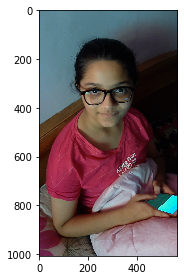

In [10]:
#Rescale Image- Making image smaller
from skimage.transform import rescale
small_image=rescale(image_data,0.25)
imshow(small_image)

In [11]:
small_image.shape

(1008, 567, 3)

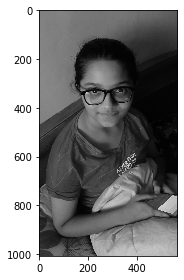

In [12]:
small_bi=rescale(image_black,0.25)
imshow(small_bi)

In [13]:
#use Reshape function to flatten image data
import numpy as np
X1=np.reshape(small_bi,1008*567)
X1.shape

(571536,)

In [14]:
print(1008*567)

571536


In [15]:
X1=np.reshape(small_bi,small_bi.shape[0]*small_bi.shape[1])
X1.shape

(571536,)

In [16]:
#Create Training data from images in form of data frame
#because all ML Algorithm fit function takes training data as
#data Frame only
rows=[]
for i in range(20):
    folder="D:\\BBAU1\\Image Classification\\images\\"
    file=df.iloc[i].Image
    path=folder+file
    image_black=imread(path,as_gray=True)
    small_bi=rescale(image_black,0.25)
    X1=np.reshape(small_bi,small_bi.shape[0]*small_bi.shape[1])
    rows.append(X1)
    print(i)
X_train=pd.DataFrame(rows)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [17]:
X_train.shape

(20, 571536)

In [18]:
y_train=df["Label"]

In [19]:
#Now we can apply Ml Algorithm
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
#now we have only Ml model as nb
#take one new image and do same operation
rows1=[]
file="D:\\BBAU1\\Image Classification\\6.jpg"
image_black=imread(file,as_gray=True)
small_bi=rescale(image_black,0.25)
X1=np.reshape(small_bi,small_bi.shape[0]*small_bi.shape[1])
rows1.append(X1)
new_image=pd.DataFrame(rows1)
new_image.shape


C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


(1, 571536)

In [21]:
y_predict=nb.predict(new_image)
print(y_predict)

['Saumya']


In [22]:
#wow done-congrats
#Just by one image, you can not say that model is gud
#then what?
#Create a test data set to test your model

In [23]:
import pandas as pd
df1=pd.read_csv("D:\\BBAU1\\Image Classification\\test.csv")
df1.head()

,Image,Label
0,1.jpg,Icy
1,2.jpg,Icy
2,3.jpg,Saumya
3,4.jpg,Saumya


In [24]:
rows_test=[]
for i in range(4):
    folder="D:\\BBAU1\\Image Classification\\test\\"
    file=df1.iloc[i].Image
    path=folder+file
    image_black=imread(path,as_gray=True)
    small_bi=rescale(image_black,0.25)
    X1=np.reshape(small_bi,small_bi.shape[0]*small_bi.shape[1])
    rows_test.append(X1)
    print(i)
X_test=pd.DataFrame(rows_test)


C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


0
1
2
3


In [25]:
y_test=df1["Label"]

In [26]:
print(y_test)

0       Icy
1       Icy
2    Saumya
3    Saumya
Name: Label, dtype: object


In [27]:
y_predict=nb.predict(X_test)
print(y_predict)

['Saumya' 'Icy' 'Saumya' 'Saumya']


In [28]:
score=nb.score(X_test,y_test)
print(score)

0.75


In [29]:
#what that suggests?
#it suggests try more, different algorithm
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
print(svc.score(X_test,y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5


In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

1.0


In [ ]:
#Excellent algorithm for my problem
#so knn is best model
#Creating GUI in python
import tkinter
window=tkinter.Tk()
label = tkinter.Label(window, text = "Hello World!").pack()
window.mainloop()


In [ ]:
from tkinter import Tk,Label,Button,Checkbutton
window=Tk()
label=Label(window, text = "Hello World!").pack()
var1=0 
Checkbutton(window, text='Machine learning', variable=var1).pack()
var2=0
Checkbutton(window, text='Artificial Intelligence', variable=var2).pack() 
button=Button(window, text='Start', width=25, command=window.destroy)
button.pack()




window.mainloop()

In [ ]:
#Always use grid structure
from tkinter import *
master = Tk() 
#Creating Widget
l1=Label(master, text='First Name')
l2=Label(master, text='Last Name')
e1=Entry(master) 
e2=Entry(master)

#Organizing widget in our window
l1.grid(row=0,column=0)
l2.grid(row=1,column=0) 
e1.grid(row=0, column=1) 
e2.grid(row=1, column=1) 

#run the window
mainloop() 


In [3]:
#GUI application for this ML Model deployment

from tkinter import Tk,Label,filedialog,Canvas,Button

win=Tk()

#Create a Canvas that can fit our input image
canvas=Canvas(win, width=500, height=500)
#Create a Label for predicting (displaying) outcome to the user

l1=Label(win)

#Define OpenImage function here before button is created
def OpenImage():
    path=filedialog.askopenfilename(initialdir="D:\\BBAU1\\Image Classification",title="Select an Image")
    print(path)
    rows1=[]
    image_black=imread(path,as_gray=True)
    small_bi=rescale(image_black,0.25)
    X1=np.reshape(small_bi,small_bi.shape[0]*small_bi.shape[1])
    rows1.append(X1)
    new_image=pd.DataFrame(rows1)
    y_predict=knn.predict(new_image)
    print(y_predict)


b1=Button(win, text="Open Image", command=OpenImage)

#Organizing widget in our window
canvas.grid(row=0)
l1.grid(row=1,column=0)
b1.grid(row=2)
win.mainloop()

D:/BBAU1/Image Classification/3.jpg


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-3-7b27c5b6c183>", line 18, in OpenImage
    image_black=imread(path,as_gray=True)
NameError: name 'imread' is not defined
